# Bayesian exploration from YAML

In [1]:
from xopt import Xopt

# set values if testing
import os

import warnings

warnings.filterwarnings("ignore")


SMOKE_TEST = os.environ.get("SMOKE_TEST")

YAML = """
generator:
    name: bayesian_exploration

evaluator:
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    observables: [y1]
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    constants: {a: dummy_constant}

"""

In [2]:
X = Xopt.from_yaml(YAML)

# for testing purposes only
if SMOKE_TEST:
    X.generator.numerical_optimizer.n_restarts = 1
    X.generator.n_monte_carlo_samples = 1

X


            Xopt
________________________________
Version: 2.4.6.dev5+ga295b108.d20250107
Data size: 0
Config as YAML:
dump_file: null
evaluator:
  function: xopt.resources.test_functions.tnk.evaluate_TNK
  function_kwargs:
    raise_probability: 0
    random_sleep: 0
    sleep: 0
  max_workers: 1
  vectorized: false
generator:
  computation_time: null
  custom_objective: null
  fixed_features: null
  gp_constructor:
    covar_modules: {}
    custom_noise_prior: null
    mean_modules: {}
    name: standard
    trainable_mean_keys: []
    transform_inputs: true
    use_cached_hyperparameters: false
    use_low_noise_prior: true
  log_transform_acquisition_function: false
  max_travel_distances: null
  memory_length: null
  model: null
  n_candidates: 1
  n_interpolate_points: null
  n_monte_carlo_samples: 128
  name: bayesian_exploration
  numerical_optimizer:
    max_iter: 2000
    max_time: null
    n_restarts: 20
    name: LBFGS
  supports_batch_generation: true
  turbo_controller: 

In [3]:
X.random_evaluate(5)

for i in range(5):
    print(f"step {i}")
    X.step()

step 0


step 1


step 2


step 3


step 4


In [4]:
print(X.data)

         x1        x2               a        y1        y2         c1  \
0  2.562254  1.500173  dummy_constant  2.562254  1.500173   7.873843   
1  0.598462  1.009704  dummy_constant  0.598462  1.009704   0.442591   
2  0.565424  2.948321  dummy_constant  0.565424  2.948321   8.111697   
3  1.519793  0.081046  dummy_constant  1.519793  0.081046   1.250524   
4  2.736085  2.544418  dummy_constant  2.736085  2.544418  12.876605   
5  0.000000  1.100162  dummy_constant  0.000000  1.100162   0.110357   
6  0.826220  0.822085  dummy_constant  0.826220  0.822085   0.258542   
7  1.056953  0.794422  dummy_constant  1.056953  0.794422   0.811370   
8  1.122051  0.725478  dummy_constant  1.122051  0.725478   0.882414   
9  0.349113  1.033914  dummy_constant  0.349113  1.033914   0.143102   

         c2  xopt_runtime  xopt_error  
0  5.253237      0.000203       False  
1  0.269493      0.000140       False  
2  5.998556      0.000128       False  
3  1.215501      0.000126       False  
4  9.17

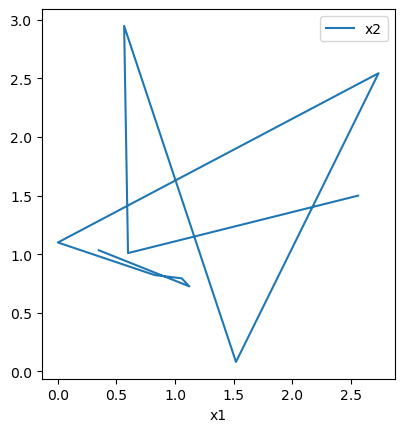

In [5]:
# plot results
ax = X.data.plot("x1", "x2")
ax.set_aspect("equal")

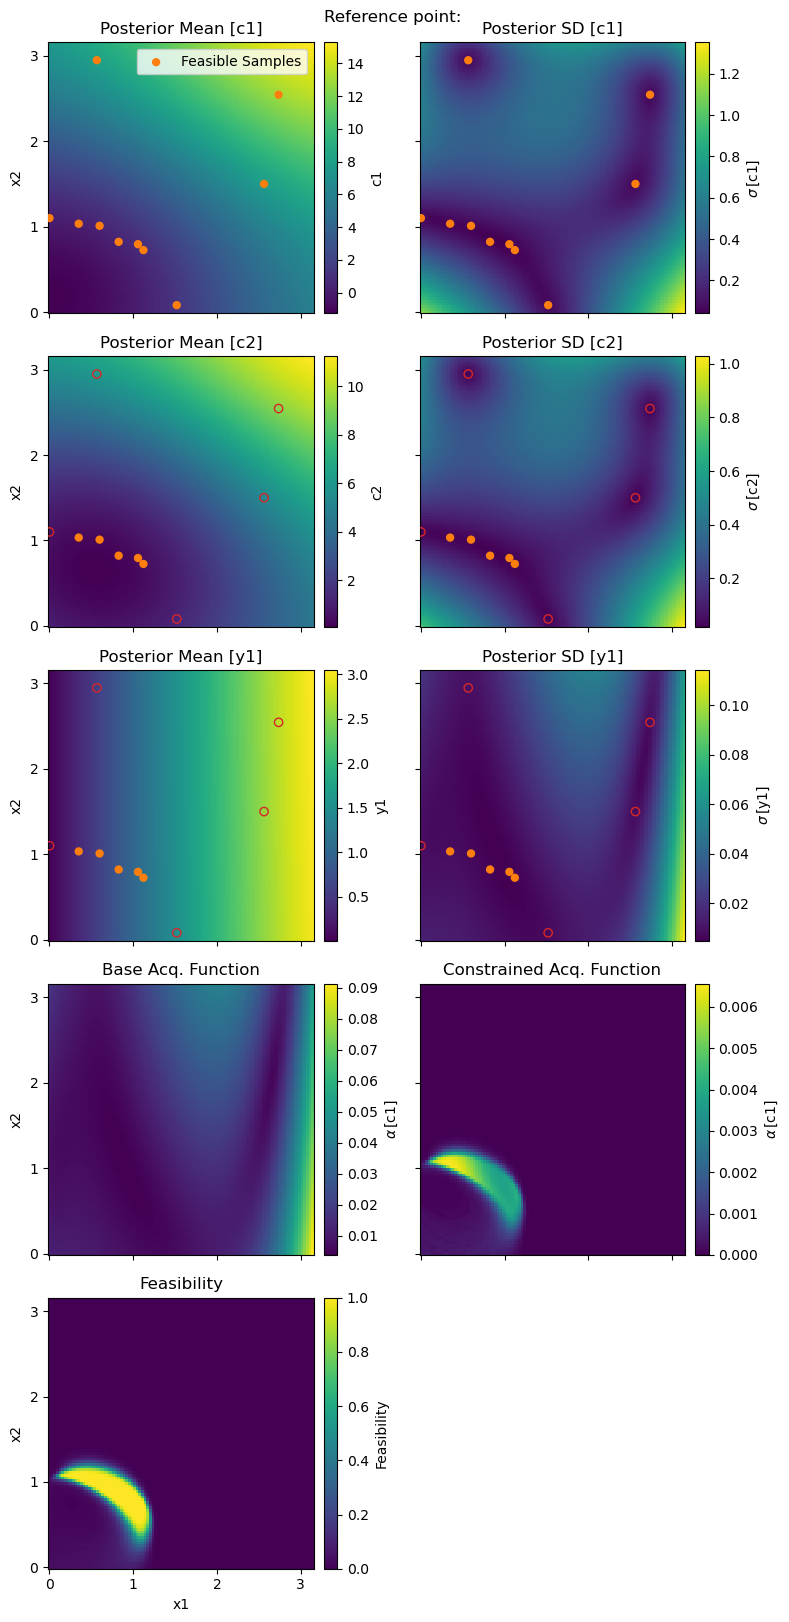

In [6]:
fig, ax = X.generator.visualize_model(show_feasibility=True, n_grid=100)